In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('weco.csv')

Taking in the columns

In [4]:
colA = data.dex
colB = data.job_tenure

Converting columns into Matrices

In [12]:
matA = np.mat(colA)
matB = np.mat(colB)
m = np.shape(matB)[1] # getting the number of columns of matrix
one = np.ones((1,m),dtype=int)


In [15]:
# Gaussian Kernel
def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff * diff.T/(-2.0 * k**2))
    return weights

In [16]:
#Local weight
def LocalWeight(point, xmat, ymat, k):
    wt = kernel(point, xmat, k)
    W = (X.T * (wt*X)).I * (X.T * wt * ymat.T)
    return W

In [14]:
#Local Weight Regression
def LWRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]* LocalWeight(xmat[i],xmat,ymat,k)
    return ypred

In [84]:
# horizontal stacking
X = np.hstack((one.T,matA.T))
ypred = LWRegression(X,matB,3)

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
xvar = np.array(colA)
yvar = np.array(colB)
model.fit(xvar.reshape(-1,1),yvar.reshape(-1,1))

LinearRegression()

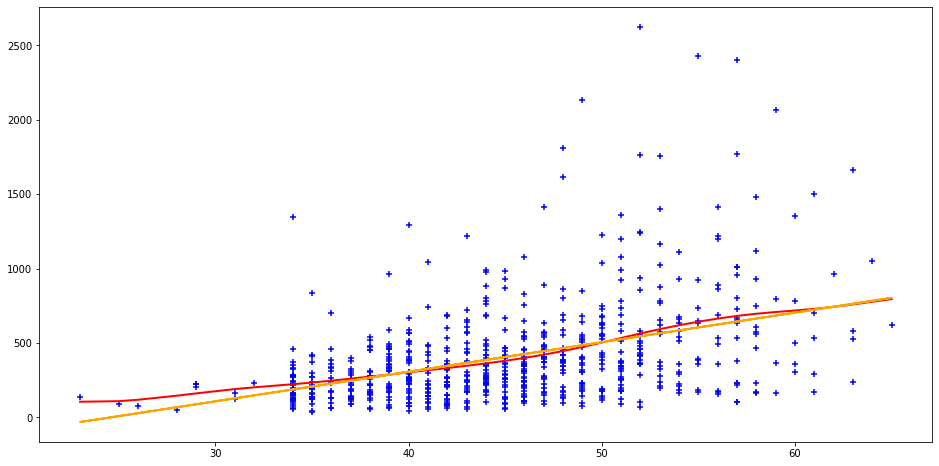

In [85]:
xsort = X.copy()
xsort.sort(axis=0)
plt.rcParams['figure.figsize'] = (16,8)
plt.scatter(colA,colB,color = 'blue',marker='+')
plt.plot(xsort[:,1],ypred[X[:,1].argsort(0)],color='red',linewidth = 2)
plt.plot(xvar.reshape(-1,1),model.predict(xvar.reshape(-1,1)),color='orange',linewidth=2)
